<a href="https://colab.research.google.com/github/amanmathur19/image-classification/blob/master/catergory_classification_medium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm


In [30]:
train = pd.read_csv('/content/drive/Shared drives/New Markets/Aman/Project Neo/medium.csv')

In [31]:
train.columns

Index(['Unnamed: 0', 'upload_date', 'brand', 'cover_image_url', 'category'], dtype='object')

In [32]:
train['image_filename'] = train['cover_image_url'].apply((lambda x: x[-28:]))
train = train.drop(train.columns[0:3], axis = 1)
train = train.drop(train.columns[0:1], axis =1 )

In [33]:
train.head()

,category,image_filename
0,Dresses & Skirts,5e17d1919d3b78474d296d12.jpg
1,Dresses & Skirts,5e102444138e1891a5c72ecb.jpg
2,Dresses & Skirts,5e0e754d9e1559244942bd6e.jpg
3,Dresses & Skirts,5e11196de974fbb7c1039027.jpg
4,Dresses & Skirts,5e195b3693b46a0f0f3f4354.jpg


In [34]:
train['category'] = train['category'].apply(lambda x: x.replace(" ",""))
train.head()

,category,image_filename
0,Dresses&Skirts,5e17d1919d3b78474d296d12.jpg
1,Dresses&Skirts,5e102444138e1891a5c72ecb.jpg
2,Dresses&Skirts,5e0e754d9e1559244942bd6e.jpg
3,Dresses&Skirts,5e11196de974fbb7c1039027.jpg
4,Dresses&Skirts,5e195b3693b46a0f0f3f4354.jpg


In [39]:
train['category'].value_counts()

Dresses&Skirts     2500
Shoes              2500
Jackets&Blazers    2500
Handbags           2500
Name: category, dtype: int64

In [40]:
d = dict(zip(train['category'].unique(), range(0,4)))
d

{'Dresses&Skirts': 0, 'Handbags': 1, 'Jackets&Blazers': 2, 'Shoes': 3}

In [41]:
train['category'] =  train['category'].map(d,na_action = 'ignore')
train.drop(train.columns[0], axis=1)
train.head()

,category,image_filename
0,0,5e17d1919d3b78474d296d12.jpg
1,0,5e102444138e1891a5c72ecb.jpg
2,0,5e0e754d9e1559244942bd6e.jpg
3,0,5e11196de974fbb7c1039027.jpg
4,0,5e195b3693b46a0f0f3f4354.jpg


In [84]:
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
train_image = []
for i in tqdm(range(train.shape[0])):
    try:
      img = image.load_img('/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/'+train['image_filename'][i], target_size=(56,56,3), grayscale=False)
    except Exception as e:
      print(e)
      continue
      # train.drop(train[train['image_filename'] == train['image_filename'][i]].index,axis = 0)

    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

X = np.array(train_image)



  0%|          | 36/10000 [00:00<01:32, 107.42it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18190d8d653d5488808ea9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e60d916105da446ac96b2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1367fb264a55676f3a4b64.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e114b87180efd046572ce5d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fab0d6a7fbaa71cc6f410.jpg'


  1%|          | 76/10000 [00:00<01:23, 119.18it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17942f90feb6ccdcd2a065.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e179819318740ef76e6b869.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19409f19c15724eef77522.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1949df22bd7c62b482d3bb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10db9fe974fb8a4701ffc0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e194d4f90feb683cbdb9f7d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0e2f12264a55ca782448a4.jpeg'


  1%|          | 102/10000 [00:00<01:20, 122.82it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1405369e155924495e8f7a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0eea2016105d3b7baf422c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1a569c93b46a9cde42de07.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fd96b2e7c2f23c5d7b843.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14100cafade82e1e15c3dc.jpg'


  1%|▏         | 138/10000 [00:01<01:26, 113.76it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fa8932e7c2f56e4d6bd3f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fd081bb22e3b601abfe2e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18da6f21cd0a752df2cde7.jpg'


  2%|▏         | 187/10000 [00:01<01:26, 113.82it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18f4d0bbf076350562388b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e11140c19c157e8bc7049a0.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e139de710f00fdc08c959a6.jpeg'


  2%|▏         | 211/10000 [00:01<01:25, 114.33it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ceb2db146cc1cc8bfd89a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e110c2d152812855dd8f2da.jpg'


  3%|▎         | 259/10000 [00:02<01:27, 111.91it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ff9e4138e18aa4cc612e9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e89a9c953d8b5b30e772e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13867716105db5b3c22fc2.jpg'


  3%|▎         | 284/10000 [00:02<01:24, 115.35it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fcc7d138e18da75c51931.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e124f71152812ca02de81ee.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a48759d3b787a0e3318e9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fa27e06d59c1eb2969c10.jpg'


  3%|▎         | 309/10000 [00:02<01:23, 116.23it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ff2f4c4cd7ed90bab2dc8.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1389e221cd0a4bebc08fcb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fb14e8557af0dfc8d0c86.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e11395dffc2d4f17f269cab.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1206c506d59c2a24a1852d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b7b3a2e7c2fb69d4eb26d.jpg'


  4%|▎         | 360/10000 [00:03<01:25, 113.37it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e169acbaa7ed3f008149126.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12478eaa7ed3471f67fb9f.jpg'


  4%|▍         | 386/10000 [00:03<01:20, 119.26it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1261c8afade8b11c0e39c2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14e70621696867b6281060.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e167e5331874033e9e286f9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17f7b522bd7cbaab7d6235.jpg'


  4%|▍         | 413/10000 [00:03<01:20, 119.63it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a708daa7ed3cd82a76215.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e118410aa7ed373126554e3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e10f3d816105d016ab6fcc8.jpeg'


  4%|▍         | 438/10000 [00:03<01:20, 118.55it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1b2038d1aa2572cc2e8e4b.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1b848f138e18859eaad199.jpeg'


  5%|▍         | 466/10000 [00:03<01:17, 122.69it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f7f1cfe19c721e6de2e1d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19f769c4cd7e13ac904aff.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1a3918bb22e3dd6e66ab21.jpeg'


  5%|▌         | 505/10000 [00:04<01:18, 121.19it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e153353241483200d84605d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13dd923187406afe8367d7.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a7d98c4cd7e69219383c2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14b8ead1aa258f28b710fe.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10af6fd1aa25e16aa5f033.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f934326219f6e1c9ed3de.jpg'


  5%|▌         | 544/10000 [00:04<01:19, 119.20it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e136dba9e1559de7e5a9207.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e122c2fe974fb0341080597.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e180a4f9d3b787a0e2ac467.jpg'


  6%|▌         | 568/10000 [00:04<01:21, 115.87it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d10481153ba1ca7be5007.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19019dc953d8e0c1940924.jpg'


  6%|▌         | 593/10000 [00:05<01:21, 115.90it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e167686c4cd7e178049bb69.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e141d686a7fba6da3db3918.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14bd628d653d19077e9828.jpg'


  6%|▌         | 617/10000 [00:05<01:25, 109.85it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0ff8909e1559cb494a1283.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b81a99e1559c6d2e8f1d7.jpg'


  6%|▋         | 644/10000 [00:05<01:19, 118.34it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e188189248f7af8137014cc.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e541310f00ffe8cb2e6b5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e164dda93b46ae206419873.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e160d0921cd0a1c5eed76f5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a63718d6f1ab8936dc7fd.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19ca8bbbf076c9746526f1.jpg'


  7%|▋         | 670/10000 [00:05<01:15, 122.78it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18f24190feb6cb92d98812.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e109562318740ead373c0e2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fa7e31153baf9da9602d5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16624f7f617fae3876dbed.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a6900fe19c711760f2c53.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f5ac7d1aa25e16aa06f6b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d61fb90feb669d0d76417.jpg'
[Errno 2] No 

  7%|▋         | 713/10000 [00:06<01:14, 124.87it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1bb2a55967044e75f6a87c.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1bb1b42f8276c984faee68.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e125f118d6f1a4c6ebd972d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e137e667f617f41b7399640.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1539be2f8276949bd579ca.jpg'


  7%|▋         | 740/10000 [00:06<01:15, 121.91it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0dd7f42e7c2f3c4acf7ca2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f948106d59cf561964439.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ba0619d3b787a0e3911af.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e114f467f617f0c6b3093a9.jpg'


  8%|▊         | 790/10000 [00:06<01:19, 115.88it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1111828d6f1a22e9b7ac86.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e189476a20dfcc86127c10b.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1963b81153ba56e855ca71.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ba1f2abe1ce205e45ce2c.jpg'


  8%|▊         | 815/10000 [00:06<01:17, 117.80it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e11423e2cc515bae765d5bc.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bd2901528126daf645ac6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cb2e1de696a41f4d54e3b.jpg'


  8%|▊         | 839/10000 [00:07<01:17, 118.05it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d15659ed36d741a15fd6b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f9d5dde696a72b9c4fb5e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e191ef3aa7ed35794a1fedb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12e0c5c4cd7e9c8db926ef.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a2a9608d2c2af0f0103e7.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d122f21cd0aa7e689cafc.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e14eeb4d1aa25a772b8403a.jpeg'
[Errno 2] No 

  9%|▉         | 881/10000 [00:07<01:18, 115.63it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1263c4ffc2d4c0c22bbcd9.jpg'


  9%|▉         | 906/10000 [00:07<01:16, 118.26it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e4fb7d400089c25304cc7.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0f1dbbd1aa252e969fd636.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e11e5de1153bafd359eccde.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10bc1a6a7fbad9f9caf7c9.jpg'


  9%|▉         | 930/10000 [00:07<01:21, 111.87it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10a644c953d80049169577.jpg'


 10%|▉         | 955/10000 [00:08<01:19, 114.45it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19f48606d59c63978e0f53.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15f9012eb33f9e546edda3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17cfd5fe19c78fa7049d43.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e120c926a7fba6da3d0bbd1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12593b9d3b7847d995451d.jpg'


 10%|▉         | 980/10000 [00:08<01:20, 111.98it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e8c582f8276bbfb9c868d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e191835d948a18492008739.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18e5c190feb620b3d943f9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18c115de696a8f223ce3ab.jpg'


 10%|█         | 1021/10000 [00:08<01:13, 122.38it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a019cd1aa256c1929d8e1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e17edf5bbf0760c255e9ab5.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14fd69180efd26ad830be2.jpg'


 10%|█         | 1048/10000 [00:08<01:12, 124.13it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a692293b46adf41434c21.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e936226219f4d6a9b25bd.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0f8fbf29f0307b2011902a.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10f06510f00f8fb2bd8e32.jpg'


 11%|█         | 1087/10000 [00:09<01:15, 117.99it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0e65aa6a7fba035dc1c73e.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12b9a919c157733b786968.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e134e4816105d82a1c13002.jpg'


 11%|█         | 1112/10000 [00:09<01:15, 117.53it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1002b6180efd98da6d3ac8.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17bf8d90feb6506fd4abd9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14fc51b3e917ead1f320cc.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0eb70010f00f101bb511ca.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ff627a20dfc88ee9cf4b9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e162b2506d59cb715b18133.jpeg'


 12%|█▏        | 1190/10000 [00:10<01:15, 116.36it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e114479b146ccb77ebbfd41.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1791785967048b6d576ab2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e120f86689ebc6cb1a00898.jpg'


 12%|█▏        | 1238/10000 [00:10<01:16, 114.42it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19200c5967045fbceb170f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1107a92e7c2f56e4dc6210.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e162100264a55f1db9377cb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e110491318740e3a2760b4c.jpg'


 13%|█▎        | 1278/10000 [00:10<01:13, 118.77it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16bb982eb33f20d481ca55.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1acca79e155931c6e5f600.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19413293b46aea053e9dc8.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e195222bd7c293f666408.jpg'


 13%|█▎        | 1302/10000 [00:11<01:14, 116.33it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1dd79719c157948641f07b.jpg'


 13%|█▎        | 1340/10000 [00:11<01:12, 118.63it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1552fd3187400ca3c112f2.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d2871689ebc7631470fb5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12781421cd0ad0cbbc39c5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19ca50d400089ef387f26f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a8425248f7ac3cd7910da.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15268daa7ed39e147402b0.jpg'


 14%|█▍        | 1379/10000 [00:11<01:11, 121.27it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e167e9f08d2c242e4710f44.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10da232f4831772e02a1c6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b8f24fe19c7a31c1404c1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e100cab2f48310ff3004768.jpg'


 14%|█▍        | 1404/10000 [00:11<01:14, 114.92it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e11085eabe1ce54b67a8e01.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a8d67264a555bd6ff3e19.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e160de1596704d1985d566f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e17b01190feb6aa50d462af.jpeg'


 14%|█▍        | 1443/10000 [00:12<01:14, 114.22it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d2c8d16105d6365370f86.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1011acffc2d4f17f2247ed.jpg'


 15%|█▍        | 1482/10000 [00:12<01:12, 116.76it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e120226aa7ed3f8dc66480c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ccfd4e974fb73e23a278e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fb80ffe19c7b427df6ef0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17a9529e15597859d6bfc4.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1c170393b46a3edc4bbd43.jpg'


 15%|█▌        | 1510/10000 [00:12<01:08, 123.57it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e176e7e90feb6ccdcd1d84b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1caae07a81734cbcf745da.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e2d12152812ae98ccdf2f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b7f1a8d6f1a689f724665.jpg'


 15%|█▌        | 1536/10000 [00:13<01:11, 118.26it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e190000596704c024ea6c47.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ea15ed948a16f0378806c.jpg'


 16%|█▌        | 1560/10000 [00:13<01:14, 113.98it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0dea68b3e917b47fd58031.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e129d1d2f483132090b48b2.jpg'


 16%|█▌        | 1601/10000 [00:13<01:07, 123.86it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e127a0559670476ca42d525.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19fa6ed948a17a45036dd5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e177a8cb3e917f527029352.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1266d08557afebfb98d207.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1d1aeb2e7c2f0c364e85ca.jpeg'


 16%|█▋        | 1628/10000 [00:13<01:06, 125.17it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12724a9ed36d35d302d779.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e62962f827600c59bab9e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14a1fa08d2c2484cd34f7d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1805588d6f1a8a5564d0cb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1242abc4cd7eea10b51bf6.jpg'


 17%|█▋        | 1667/10000 [00:14<01:10, 118.06it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e15372efe19c76e77f6b753.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13c92f19c157d5047be39e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1360aae974fb6a0d0db81b.jpg'


 17%|█▋        | 1706/10000 [00:14<01:10, 117.27it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16880e7a81730f6f94609a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1c01b2689ebc4a30d158ee.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cc88c06d59c0ed715b195.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bd983138e18866eace980.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e194138264a55b7aef9efb2.jpg'


 17%|█▋        | 1742/10000 [00:14<01:11, 115.39it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0f4bfc2f4831001ffc3d26.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e175c4b26219f238c540d2f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18db18bbf076126461aa2b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a788aaa7ed37441a78f76.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14988cd1aa25ac7eb697eb.jpg'


 18%|█▊        | 1770/10000 [00:15<01:07, 121.08it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18ca5fc953d847d192e83c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17ac63adb58d51c7716860.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10ccf0ffc2d4c0c2244117.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bd70f248f7ac3cd7f0adf.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e11140cc953d8fec218e5b1.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e126632d40008377441bc79.jpg'


 18%|█▊        | 1796/10000 [00:15<01:08, 119.92it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18aad72f82769f33ed0185.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d3b3f2f4831ea0b98270b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1b9af179df277875fa5197.jpeg'


 18%|█▊        | 1822/10000 [00:15<01:13, 111.20it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e142f5410f00ffe8ccc4137.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e149d64c953d80049275dfb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e6f8121cd0af680aa0721.jpg'


 18%|█▊        | 1848/10000 [00:15<01:09, 117.38it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bd3388557afa7375055f4.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f6c34248f7a40c49a549c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d1fc77a81734164f9a2f9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16d1fb19c1570dc69c83aa.jpg'


 19%|█▉        | 1886/10000 [00:16<01:07, 119.38it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19ef9190feb6b0e7dd1609.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0fd391138e18e01dc53dce.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1767bd9e1559f5ac4b2c64.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a2643ffc2d4dc24c1f27d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e11181759670401973c08d4.jpg'


 19%|█▉        | 1935/10000 [00:16<01:08, 117.42it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e140665138e18ba4dd775fb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f840319c157a8eb6987ed.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ebd1dde696a5497c21471.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e164bec08d2c2f889476b0e.jpeg'


 20%|█▉        | 1959/10000 [00:16<01:12, 111.33it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1783b36a7fba2e8f7e9eef.jpg'


 20%|██        | 2008/10000 [00:17<01:12, 109.63it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1a780a1153ba922859c7e5.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d259810f00f3680625df5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1d187ede696a42ebd75836.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e124189596704716b412372.jpg'


 20%|██        | 2034/10000 [00:17<01:10, 112.23it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e151a942cc51539b376c6e1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18a5e62414837609dad3fb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10efd826219f62e4a44fc5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d24a4e974fb02753c0995.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10e61b9ed36db7a9fb4cde.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1acbb229f030584bbe04b6.jpg'


 21%|██        | 2074/10000 [00:17<01:04, 122.63it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d512e08d2c25532d560b4.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e163760abe1ce6c7f41fae3.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10f237e974fbc912028df9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1c999a06d59c9a9114b1e1.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e192356afade810037cfba8.jpg'


 21%|██        | 2102/10000 [00:17<01:02, 126.55it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e125e652e7c2f913be262a4.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1baf34fe19c763d114c9d7.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e15602c16105d8a20bffbb2.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cdcfeffc2d46c332a9d07.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e137b6979df278e2dfe4b29.jpeg'


 21%|██▏       | 2128/10000 [00:18<01:06, 118.66it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1bc206e974fbdd520da567.jpeg'


 22%|██▏       | 2153/10000 [00:18<01:06, 117.39it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e101eef7f617fb97f2c0854.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f94c1adb58d8a4600a10e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1154ecb146cc023dbc657f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e110436fe19c70b48e4c3ce.jpg'


 22%|██▏       | 2189/10000 [00:18<01:07, 114.93it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a8c7993b46a980b441a42.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14e1192eb33f3e3de85ef5.jpg'


 22%|██▏       | 2225/10000 [00:18<01:07, 114.72it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1e0fc2969d1f5f389f2829.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fa7c2c953d8f8d612dd84.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10f58e93b46a9ff2799973.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ec7a022bd7c4d986a594f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e151c70d1aa252eafb923b1.jpg'


 22%|██▎       | 2250/10000 [00:19<01:06, 115.72it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1c92efadb58d75ce3d592c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fc6a82f8276e2eaa1a999.jpg'


 23%|██▎       | 2274/10000 [00:19<01:11, 107.92it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1924c279df2733b2f0053b.jpg'


 23%|██▎       | 2303/10000 [00:19<01:02, 122.74it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14d440689ebc0b6babfc3e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13b1f8d400082acd46ffaf.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d2b88ffc2d4dd5f2c3d52.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13dde2bbf076b9bab68e7a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e114ae6d1aa25e16aa9478c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e140ade2f8276e2eab557f6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12b18d21696802861fc145.jpg'
[Errno 2] No 

 23%|██▎       | 2342/10000 [00:19<01:02, 122.95it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14202f93b46a9ff288f46d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b318f689ebc8534cc1f4a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a005a9e15591d64e0b2ad.jpg'


 24%|██▍       | 2392/10000 [00:20<01:05, 116.09it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15e5a28d6f1ae0e6f2e183.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ff2df06d59c829c989b05.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18dc622414833415dbff8c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17c1a7ffc2d41fe0b8bb0a.jpg'


 24%|██▍       | 2416/10000 [00:20<01:08, 110.31it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16c3befe19c71ee9da6f4f.jpg'


 24%|██▍       | 2441/10000 [00:20<01:07, 111.75it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1155af1153bac1189d4b5b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e164fca152812288e5769e4.jpg'


 25%|██▍       | 2477/10000 [00:21<01:08, 109.07it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13e3c4de696aaf25d79af0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bd015264a555ee104f144.jpg'


 25%|██▌       | 2511/10000 [00:21<01:08, 109.65it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18268ad40008ed2a8252db.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ce37a5967045aab39696c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e00ff08d2c2e71bb6c1a0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1216c5180efd0465758296.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e113d74596704a7df3ce6d7.jpg'


 26%|██▌       | 2560/10000 [00:21<01:08, 109.14it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14cec906d59cfb8baf7903.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15e33908d2c2d1ea455c41.jpg'


 26%|██▌       | 2584/10000 [00:22<01:07, 109.87it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1291dd1528126b4ce03b1c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e18cb14969d1fa44c3455a8.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e135f0221696802862173c9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17350279df277d5b995b72.jpg'


 26%|██▌       | 2607/10000 [00:22<01:09, 106.58it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12b7dcbbf076b9bab29ed8.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a1a56adb58dafad7ab90e.jpg'


 26%|██▋       | 2632/10000 [00:22<01:04, 114.73it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ceb3c2e7c2f2c1a4d94cc.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b6fc7216968b34e14dd5d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e10f46715281200fed859a8.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12afaa24148336467a526a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1624ab8d6f1affc4f3f2c5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1918e61528129dbf586eaf.jpg'


 27%|██▋       | 2658/10000 [00:22<01:01, 119.48it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cfb442e7c2f26f44ddb0d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a4ee92eb33f7fbda5ce1f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e180ad28d653d1ceb806b65.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e17380521696812f49c211d.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17456916105d86fd2df690.jpg'


 27%|██▋       | 2697/10000 [00:23<01:01, 119.58it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e191dd08d653dbaf6842d5e.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e161529248f7a9ade1c50af.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17719793b46a15d29a5607.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13852e9e15597c975b1ea6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16a9e8afade8d44a1e56d6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bbeaf08d2c25d01085fa9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e11195e180efde13471aaad.jpg'
[Errno 2] No 

 27%|██▋       | 2724/10000 [00:23<00:58, 123.54it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0e8dfb264a55ed1e262b3d.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ca1aa180efd4be95f6074.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b72c4de696af60047f3e0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e114d4fafade8a9f3099a01.jpeg'


 28%|██▊       | 2765/10000 [00:23<00:58, 124.09it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e114d44c4cd7ed323b13567.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b27ede974fbf9ee09d5e3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1927e2264a555ee1f95707.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1e82c98557afbdcc3a8e5d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1090cc596704cef4393529.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1c62ef689ebcb3fa438554.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16497506d59cdf14b253b2.jpg'
[Errno 2] No 

 28%|██▊       | 2805/10000 [00:23<00:58, 123.51it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18280921cd0a752df09c57.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e113437d40008778f3c7abd.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d186721cd0a4f5989f1ee.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ccc35248f7af8b0696b68.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1636416a7fbac126de91ab.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e177c2a248f7a77f4989d6d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e114514b146ccd1fdbc00c3.jpg'
[Errno 2] No 

 28%|██▊       | 2830/10000 [00:24<01:03, 113.17it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e100a792eb33ff0f6d4b74a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cceafd40008e5629c00a2.jpg'


 29%|██▊       | 2854/10000 [00:24<01:06, 108.08it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10fca493b46adb6d79ccb8.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18a2a28d6f1a689f6629cb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1919fb8557af65ea449221.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e156eb206d59cb6acaf5dbe.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ceb8a16105da80a35b13b.jpg'


 29%|██▉       | 2893/10000 [00:24<01:00, 116.80it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e10c8bb7f617fb46e2d9719.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e105aa48d6f1a2fd4b4e761.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cf0f710f00fa081614630.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f2f1aaa7ed39e145adb7e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a3bfe1153ba6f0a587cbe.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13fafe2eb33f3e3de57838.jpg'


 29%|██▉       | 2917/10000 [00:24<01:00, 116.65it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14fbe7b3e917f4d3f31e92.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ea804248f7ad4ed97e85a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e127a821153ba9ce0a24778.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ca2ed7f617f30c8d32461.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e11161919c157ebf4705520.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e11274a9ed36d4a28fccf37.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17704b248f7a3c0b986516.jpg'
[Errno 2] No 

 29%|██▉       | 2944/10000 [00:25<00:58, 120.58it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e174e55fe19c70e7bdb843b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e103f202414837fca6eb863.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ccc668d653dca851aaa90.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bd1f759670410d7f786fe.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e14b1b0138e183061d90c8f.jpeg'


 30%|██▉       | 2969/10000 [00:25<01:04, 109.61it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1245f521cd0ad0cbbac25b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13a263d948a16f038d4716.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fbce208d2c27b12be3c93.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e11dc8522bd7c4d98769173.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d231921696847b3cae1e5.jpg'


 30%|██▉       | 2999/10000 [00:25<00:56, 124.34it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ea646318740e60a6c0f57.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1624f3b3e91722f6fd4d97.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fab69248f7acf179bb430.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e178468bbf0763d77a3e5ee.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a5867adb58d9ee07c110c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12a1f4241483c1f079ca44.jpg'


 30%|███       | 3038/10000 [00:25<00:58, 118.87it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19005524148360c0dcc941.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14b26919c157ec257f02a5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0f60fe90feb6d4142ef682.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e122b4c19c157d504748745.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16630a93b46a9a21966b39.jpg'


 31%|███       | 3063/10000 [00:26<01:03, 108.95it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d4ff81153baa9f3bfea9f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1791137a81735c0f97f618.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1c6be690feb61570d26f07.jpeg'


 31%|███       | 3089/10000 [00:26<00:59, 115.94it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1238327a817301c5cf4cb9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e222bb3e9171fb0d62ba4.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d2643b146cc1cc8c10f62.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1a0d442eb33f668da46505.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1889611153ba92285164f9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cce4f8557af3f140f1252.jpg'


 31%|███▏      | 3138/10000 [00:26<01:01, 111.83it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a13adffc2d420fec189d2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d57de2eb33fa821d77b52.jpg'


 32%|███▏      | 3162/10000 [00:27<01:00, 113.88it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e06432eb33ff9e3cbaef6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10f9c51153baac6d9b5566.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a56c1248f7ac5ee780b29.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1362a379df27e065fdc825.jpg'


 32%|███▏      | 3186/10000 [00:27<01:01, 109.96it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1626912cc515765e059603.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ee5af79df275e08eb741c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1c99269d3b78205497e012.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fcc7e264a5594d62b3812.jpg'


 32%|███▏      | 3210/10000 [00:27<01:01, 111.30it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bdb1a8d6f1ac2cc74a89e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d4289c4cd7ee07e5d3409.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1be7999d3b78474d3af1ad.jpg'


 32%|███▏      | 3248/10000 [00:27<00:57, 117.62it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e101d5effc2d43ebd22934b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19c944abe1cec9eb3d84f6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e71ecde696ae280c05396.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14059190feb6042044e249.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e127d31d1aa256a22aea29d.jpg'


 33%|███▎      | 3285/10000 [00:28<00:57, 116.01it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e5d84264a55ca7825302c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12d255596704cef44512ce.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1263e73187406afe7cc45f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12ae1829f030791c1fdc47.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12854dc953d88c9b1f9536.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f6d3faa7ed3f8dc5baad9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fe9889d3b78c0118af217.jpg'


 33%|███▎      | 3332/10000 [00:28<01:01, 108.50it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e128302ffc2d40bea2c85d3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19f59319c1570e1ef96058.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e163e49d948a1020523e1c1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d22848d653d72381c77a5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0eb392bbf076a9f1a11f3f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e179d1031874033e9e6d7e9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1249ae248f7a4d29a6bb78.jpg'


 34%|███▎      | 3361/10000 [00:28<00:54, 120.91it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e160de9969d1f49ef8c6563.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e128e85d1aa25c1e7af18aa.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e133bcfffc2d44d5b2efa6a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1260ee08d2c29ad3ca2b61.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ccfe26e3239ede4850035.jpg'


 34%|███▍      | 3389/10000 [00:29<00:52, 125.43it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0ea6192a568e65c42fa6c5.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e160bc4248f7a86f41c1ce3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ca775abe1cef678023713.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e184142e974fb2602fe31ab.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13a645c953d8fe3423ec45.jpg'


 34%|███▍      | 3415/10000 [00:29<00:54, 120.36it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1c013116105db0fac5d91f.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1751e49ed36d7ff38cf325.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1500e8fe19c70b48f59e6e.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10b6192f4831fca701efa0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17787990feb6266bd20b7c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e162aafd948a1efd4237a4d.jpg'


 34%|███▍      | 3441/10000 [00:29<00:55, 117.74it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1cbc9a8d653d8e361a6282.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a82dfb3e917f85cf27ff1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1286d2969d1fc8b65b641f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1abecd1528126bfb5fabe8.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1147c9afade873d4097d7c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13b306180efda7167d983f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e161d96a20dfccd18b5ce2e.jpg'


 35%|███▍      | 3468/10000 [00:29<00:52, 123.93it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e174715de696aafb385b938.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e177b63264a557dd17c43de.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10fdee2f8276d0d0a6bd6a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1c90b3b3e917bea3064c62.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19ffeb689ebc7a19c71e64.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e169854c953d8a66e509cff.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e7c9daa7ed37312584ea2.jpg'


 35%|███▌      | 3506/10000 [00:30<00:56, 114.22it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e19c6fc2414833415df88fa.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e14e18b2e7c2fe8e5ec581d.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e19c31b8557af11ff46b710.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fcb538557afebfb8d9004.jpg'


 35%|███▌      | 3543/10000 [00:30<00:56, 114.03it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b619ec4cd7e3d5996c838.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17a49022bd7c11f77d7d51.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10ef8493b46a1d97796960.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e154d3f9ed36dca65799f9a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fee3479df274463ef6bd4.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17342a689ebc304540d8ce.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e082a75216968eaedd87ec7.jpeg'
[Errno 2] No 

 36%|███▌      | 3570/10000 [00:30<00:54, 118.61it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d62c2afade8787037eead.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14e9eaffc2d43ebd35b722.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15867f8557af8010fe2a20.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ea7c206d59c8cfb929f19.jpg'


 36%|███▌      | 3596/10000 [00:30<00:53, 120.35it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18194926219f488f15e559.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b89629d3b7882203879e6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0d6f0106d59c6db88dc9cb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12b6e7a20dfcd458a97db6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e127a2d8557afaca5994a1f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a1044180efd4365783829.jpg'


 36%|███▋      | 3635/10000 [00:31<00:53, 119.92it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b9fa2264a556d1103bc0f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18d9c28d653d1ceb82c5b9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fdd652cc515468f5fa928.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e191e10afade8df7f7cdfcb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a1b4316105d1ba2bc5e07.jpg'


 37%|███▋      | 3661/10000 [00:31<00:52, 121.23it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15fb0cde696a811edec5f6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a8e2d3187404422632a6e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1cb606a20dfc5789d78931.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1d9c197a81735849fb5958.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1e94feb146cc958412c9f7.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e196e5ab146cc97109da59c.jpg'


 37%|███▋      | 3702/10000 [00:31<00:49, 127.56it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e161d4c138e18a8e0ea3388.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e137dc99e15597afb5af609.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0f3473a20dfce667993da0.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a996a2eb33f3939a798c0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18131221696851bf076836.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e20bad948a187e975e6d0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fdac7abe1cec64175cc55.jpg'
[Errno 2] No 

 37%|███▋      | 3730/10000 [00:31<00:49, 127.00it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17c840d1aa25132d217f55.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b9c339ed36d9d3ca3f05b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e196af0248f7a74d174bb55.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e174285c953d87a3c5286dc.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18ff77138e181270a0946c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1502e5138e18d45adacb8d.jpeg'


 38%|███▊      | 3758/10000 [00:32<00:49, 126.33it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1375ba8d6f1a2563c1ef54.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e86d52f483177b0f9ae74.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13bba28d653d19597b0145.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e178c3222bd7c640f7ceb6c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1e8b5529f030a0bf80552e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e132065b3e917fc4deba176.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18ae1e138e18866e9ee81b.jpg'
[Errno 2] No 

 38%|███▊      | 3784/10000 [00:32<00:51, 121.67it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e134853fe19c78174ee75c3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bc26b8d6f1ab893740d17.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12757eafade821330eb024.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17f82e2cc5153ebe0f5964.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14cca921cd0a1484c599df.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18f8b62f4831d022a3bb18.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e149f6ed1aa257334b6af45.jpg'


 38%|███▊      | 3812/10000 [00:32<00:48, 127.74it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5dba278510f00ffa78773cbe.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12a96c8557affe7f9a96d5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14e8f690feb6042047ba9a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1e08ed689ebca4ca2ceb0c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b35fae974fb103d0a0e66.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a4d7226219facf81e2a99.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e125cc4596704019742156f.jpg'
[Errno 2] No 

 38%|███▊      | 3839/10000 [00:32<00:48, 128.15it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d0af4264a55b23ca03f2b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b87061528129577627354.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17f6cd180efdebe1707424.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fbe339ed36d0369f6d28b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18ddc7d40008ed2a848d3d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1aac28de696a8f22459328.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e151ba42cc515bae776cc59.jpg'


 39%|███▉      | 3879/10000 [00:33<00:48, 125.42it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e66da22bd7c4ac66802a0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13e7a722bd7c42a580941c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1607b6318740ff3ec2e26f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1acc1aadb58dafad7e6451.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17a42e2e7c2f2cb83f3081.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0edb0e9ed36dd143f3b6e6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1c240a16105d7aa0c61ea1.jpeg'


 39%|███▉      | 3906/10000 [00:33<00:48, 125.32it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12727122bd7c5f287a29c5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19169e29f0306fc8b6bf76.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1756d793b46aec4d99d7cc.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e155149abe1ce97b33f41fb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0fd96c06d59c52cd980007.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1520e4fe19c7d8d5f63859.jpg'


 39%|███▉      | 3932/10000 [00:33<00:49, 122.55it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19d7f9d1aa25132d2929e5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f92339e1559de7e478fd9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e166a519ed36d8f0e89b6d1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e135e8b2f8276d18bb16554.jpeg'


 40%|███▉      | 3957/10000 [00:33<00:52, 115.43it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1604911153ba67a2913cdb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1bf578ffc2d4b952cad7db.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e111ad2241483df0571f989.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e19c5a7abe1ce38b63d7d8a.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1c713fbb22e367ea4a0b25.jpeg'


 40%|███▉      | 3996/10000 [00:34<00:49, 120.13it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ea507abe1ce027870fcf1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d1b5a26219f6e9208e0c8.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1391d7318740f8d681c220.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a32c98557af1c6248bbdb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e137e6129f0303308223ff3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e123c959ed36d9aab013325.jpg'


 40%|████      | 4034/10000 [00:34<00:51, 116.95it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1776e4689ebccc4c41ed04.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18bbca248f7a74d1711374.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1adf5f9ed36dac36a09f3a.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e153360aa7ed33fe7102b96.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a1741d400087d0989533b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e1f7810f00ffaf0b1e200.jpg'


 41%|████      | 4058/10000 [00:34<00:52, 113.65it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17473c216968b6c89c583e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1a110621696838380ea6b9.jpeg'


 41%|████      | 4082/10000 [00:34<00:52, 111.68it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0df8952f483177b0f72bc7.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e193ee910f00fd4d91f1256.jpg'


 41%|████      | 4105/10000 [00:35<00:54, 108.84it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ca88eaa7ed3516e2bfed7.jpg'


 41%|████▏     | 4141/10000 [00:35<00:51, 113.42it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e3d13138e18aa4cbe8cd4.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f677bfe19c7eceeddaa99.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1240d1241483162676fd21.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14ed032e7c2f640bec9f54.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e167915afade81de81d1a4d.jpg'


 42%|████▏     | 4165/10000 [00:35<00:52, 111.70it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1e1ae7d400080dfddbf5e0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e128ec45967040ded43746b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e142cdf2f48310b0111b184.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19a7062e7c2f50be471137.jpg'


 42%|████▏     | 4191/10000 [00:35<00:49, 117.18it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1b30b516105dbfc8c0a576.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1b6e6fd1aa25db63302221.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d152fb3e9170a7b08cfe0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1b75352cc51534351d65c3.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14fbb5afade8ff5618b6ee.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e8c918d6f1a2697ad6329.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1e2fa8c953d8ba4c5e3f18.jpg'


 42%|████▏     | 4219/10000 [00:35<00:45, 128.01it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bd1872f82768670fbc7dd.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16724fadb58d20b7ce0099.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1c9ad98d653d6a1319c9d6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a165c2f483178eca7e8c0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10c96a180efda78b6fb0dc.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16fa5929f030155de7049c.jpg'


 42%|████▏     | 4244/10000 [00:36<00:51, 112.14it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13e27fffc2d44d5b31f630.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16082308d2c25abc45e870.jpg'


 43%|████▎     | 4283/10000 [00:36<00:48, 117.08it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13b4cb2cc5155ae070cb48.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ca9e606d59c9a9115024d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e125a1e138e18da75cff91f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e14d54206d59c1eb2afa1b6.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e13286210f00ffaf0c77598.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cb54b16105da80a348bab.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1a0ffc6a7fba39c2eac168.jpeg'


 43%|████▎     | 4310/10000 [00:36<00:48, 117.39it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a6d17180efd387b7a6b60.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f8f8d969d1f0c4e4dfd3e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ba745b3e91732f4f74b21.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10e3d2152812ca02d7f553.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12535ac953d8f8d61e4c1b.jpg'


 43%|████▎     | 4337/10000 [00:36<00:48, 116.10it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1748a2d1aa25112208364f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b7f8aa20dfc40f8343b27.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e117ad726219ff91ea77b6e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ad8e416105d2729c00eb4.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10f4392169687b6416594f.jpg'


 44%|████▎     | 4361/10000 [00:37<00:51, 109.67it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e152ea6b146cc10b4cc4ce2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16ab7dfe19c70968da1067.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1e5794969d1f4b18a09761.jpg'


 44%|████▍     | 4387/10000 [00:37<00:48, 114.94it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e194aa779df27dc0df1000e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e137b7522bd7c23437e4db3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1848f022bd7c62537e2b7a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16a43b7a81730f6f951bb0.jpg'


 44%|████▍     | 4414/10000 [00:37<00:47, 117.03it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1545332cc5157e4502a797.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b850e1153ba9b3e5df5a2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b6613c4cd7e8d1896e176.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14c2b92eb33f96eee7c98b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a4bb1de696aea33436429.jpg'


 45%|████▍     | 4454/10000 [00:37<00:46, 120.46it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e10346408d2c24220c0c90b.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fa76fa20dfc2cf79b4e49.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1209f322bd7cb262773cfe.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e123aebaa7ed3b16c6795db.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14e927318740656987724f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e19fadb7a8173831bd6e729.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17dbe47f617ff4175f6bce.jpg'
[Errno 2] No 

 45%|████▌     | 4503/10000 [00:38<00:49, 111.34it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e6d9922bd7c4ac66826bb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ac1b6216968c95712add0.jpg'


 45%|████▌     | 4548/10000 [00:38<00:52, 103.75it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fd83b06d59c7cee97f8e9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16a85519c15719289bf3d0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1350d12169680286213a87.jpg'


 46%|████▌     | 4573/10000 [00:39<00:50, 108.34it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e112a9493b46a1d977addd8.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e191f839ed36d081a98f87c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13a85a180efd11347d5cbf.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bc9f426219facf825082c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12870e8d653d2a30765193.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18c716b3e917b804eaf25c.jpg'


 46%|████▌     | 4610/10000 [00:39<00:47, 113.25it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fc7c2fe19c7b427dfbb37.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b7fc7318740a33e66e5a1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14f7c9138e18d0b6da9202.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cb999aa7ed3a56e2c4e89.jpg'


 46%|████▋     | 4639/10000 [00:39<00:42, 125.95it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13ac3019c157e8bc7b5ad2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10e94dd1aa25c1e7a709ec.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fcaf87a8173d76ac5724c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1203b0adb58d759e0a7821.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10f63a26219fcb44a47e70.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10d19e8d6f1a9356b63021.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bc8bf93b46a744b49f42f.jpg'
[Errno 2] No 

 47%|████▋     | 4679/10000 [00:39<00:42, 126.64it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1009c06a7fba6da3c913ab.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13a7d216105d3b7bc2e662.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1233e206d59c3839a2db04.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e136194d948a1b6108c0275.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15f6bbd948a102052284c5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19ff1b79df27a03ef2cbd4.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18d3a716105d7aa0b74728.jpg'


 47%|████▋     | 4705/10000 [00:40<00:43, 121.46it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1678355967049e03533968.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0f7d5919c157a8eb69613f.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b88111153ba2f965e0b47.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1cc00d19c1573d9e06fdf1.jpeg'


 47%|████▋     | 4731/10000 [00:40<00:44, 117.29it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bc87e22bd7c77d08dd950.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17f610d1aa2572cc229fa1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a8658fe19c7a31c0fcddd.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a05c5fe19c711760cf1ed.jpg'


 48%|████▊     | 4755/10000 [00:40<00:44, 116.71it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e178851bb22e380c0388832.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14fe556a7fbade36de2862.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1735e38557af4a8aeb61db.jpg'


 48%|████▊     | 4779/10000 [00:40<00:46, 111.86it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e99b3de696a8d36c12af0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1801dcfe19c71e6405ea64.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1032989ed36d9aabf952f2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b5cbade696a95dd476e1b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e101db919c1574ef66d02e6.jpg'


 48%|████▊     | 4805/10000 [00:41<00:46, 112.64it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17cf642414835594d7fe95.jpg'


 48%|████▊     | 4830/10000 [00:41<00:46, 111.21it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1342459d3b783af198e2ab.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a6322d1aa25d0d22c0739.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10e24ae974fbf8460226b5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b697622bd7c16e08b339a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19fa2cc953d8280e976f55.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16594b8d653d955ea284c5.jpg'


 49%|████▊     | 4868/10000 [00:41<00:43, 118.63it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10fe4e138e18d0b6c9e0e5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17970d8557af1295ed13fb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e5b1d3187406afe6a6b33.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19ed9a9e1559c6d2e04e53.jpg'


 49%|████▉     | 4895/10000 [00:41<00:41, 121.76it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e152dd3c4cd7ec3ffc25587.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18cba66a7fba3c61e5bf37.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e0045bb22e396f5a46325.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13c81babe1ce0278867c83.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0e1906c4cd7e9c8da2902e.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d186d29f030a22b1cb8b4.jpg'


 49%|████▉     | 4921/10000 [00:42<00:42, 120.04it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bd4f2bb22e329bf6e3661.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1906b9969d1f5c76358e3d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14c26e21cd0aa61fc563d4.jpg'


 50%|████▉     | 4958/10000 [00:42<00:44, 112.89it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17df2122bd7cbaab7cac1b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12144bd1aa25ac7eabde7d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19495722bd7c62b482cfe9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b4b26c4cd7ee2c196344c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1e043c1153ba14245b1587.jpg'


 50%|████▉     | 4982/10000 [00:42<00:44, 111.79it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1935ca16105d442db94c62.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1187f93187406afe790757.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e138f3090feb6d41442128d.jpg'


 50%|█████     | 5019/10000 [00:42<00:43, 114.62it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13b8ac06d59c1eb2ab0533.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e168d763187402d57e2e227.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e437ae974fb34b0f72192.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e134fdc2f48310b010d6103.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10e9d58557af7d9191da4b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1373a8248f7ad4edab9e71.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e153c2b1153ba468b8ee0a6.jpg'


 50%|█████     | 5045/10000 [00:43<00:41, 120.15it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e161e172e7c2fb778a489dd.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15350626219f8ccdb695ca.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13bac87f617fd9b03ac5c1.jpg'


 51%|█████     | 5072/10000 [00:43<00:40, 121.13it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1e2321596704bfd8308d6d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f3b8f79df274463ebed73.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1be5de264a556d1105975d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e16458e9e15598709efa40f.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b98872414834176e83e0a.jpg'


 51%|█████     | 5113/10000 [00:43<00:38, 127.23it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a749e2f8276c984f53f36.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e189b7a2f82764caaecc030.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e11ea65b146cc7b94bdf2d3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e11036a2eb33f80b9d834ab.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13fa361528126ee4e5f554.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10e232d948a1b610812b90.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1480001153bafd35a9e893.jpg'


 51%|█████▏    | 5140/10000 [00:43<00:40, 120.20it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17baccb146cc860b967d3c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1102757a8173e3a9ca562a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fe24d7a81733fefc5edf1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e115eddbb22e3b601b2f3c8.jpeg'


 52%|█████▏    | 5166/10000 [00:44<00:40, 118.59it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e11015c248f7a1657a12d5b.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1691aec4cd7e17804a55c3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e171b9f1153bad822f4bcce.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16537a8557af801000d3ec.jpg'


 52%|█████▏    | 5190/10000 [00:44<00:42, 112.78it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12bfc82f8276d0d0b012f4.jpg'


 52%|█████▏    | 5226/10000 [00:44<00:43, 110.57it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a0a3e21cd0a4a3bf78b42.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e15e3a21153ba468b90c53b.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16928d1153ba030ef32945.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e110b37a20dfc88eea124bf.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15e5dbde696a5ee3de7d9c.jpg'


 53%|█████▎    | 5264/10000 [00:44<00:41, 115.05it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1733812cc51584417e6808.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0eaa272e7c2f23c5d30d0a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19cd23596704ef9eed3c5f.jpg'


 53%|█████▎    | 5290/10000 [00:45<00:39, 117.89it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1e8bbfc953d897bc606a07.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14bf7108d2c222aed3d7e3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ba4a926219f959c241c80.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1d1690bb22e367ea4d0a69.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10ee24c4cd7e9c8daed85a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e40f17f617fb97f236252.jpg'


 53%|█████▎    | 5314/10000 [00:45<00:41, 113.32it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fc173b146cc543ab586d4.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15eae6de696abd59de8e47.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e16a6702cc515dacc7d2a23.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e314890feb6f3b92a27bb.jpg'


 54%|█████▎    | 5353/10000 [00:45<00:38, 119.32it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1391cd29f03035c8229b7f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e135dfe10f00f4d59c81664.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cf9b5d948a119ae2b7031.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10e7827a81730b60c9a70d.jpg'


 54%|█████▍    | 5390/10000 [00:46<00:39, 116.17it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15e49306d59cb715b02750.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bcf49fe19c7190a1595d0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1204c5b146ccf78cbe5a71.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13f151abe1ceebf2875f56.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fc2b68d653da03e6a3e38.jpg'


 54%|█████▍    | 5416/10000 [00:46<00:38, 119.88it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e115516ffc2d4387527432e.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e190f8c19c1572201f65e33.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18af9aadb58dafad74f023.jpg'


 55%|█████▍    | 5453/10000 [00:46<00:40, 111.41it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e16193006d59ca62eb11c4e.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17c7d521cd0a6ca2eebb90.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14b55b689ebc33eaab5360.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1938e92eb33f7fbda1ae7a.jpg'


 55%|█████▍    | 5477/10000 [00:46<00:40, 112.28it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1132f8046e7de3f0c63d53.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0e37907a81738d5cbeb49c.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b53be9ed36d388fa1e579.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a29ca16105d1ba2bcae17.jpg'


 55%|█████▌    | 5502/10000 [00:47<00:38, 116.42it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a21f19d3b781815323679.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b18bf24148360c0e553b9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0e4d0c221536e2c20516ac.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cfe26969d1f91501755b4.jpg'


 55%|█████▌    | 5530/10000 [00:47<00:35, 125.60it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e127b5f1528126b4cdf9f2f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e172554bb22e3562636f504.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1cb40bd40008d21f9b84ad.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12700e264a555e1936ad8f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e132008bbf0768b7ab360d9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10e4cb21cd0a8fbfb44630.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15533121cd0a3883eb95bc.jpg'


 56%|█████▌    | 5569/10000 [00:47<00:37, 118.60it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e17c7f8c4cd7e13ac87e5b8.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1e9913318740749d06727c.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a24c7d948a17d2104680c.jpg'


 56%|█████▋    | 5630/10000 [00:48<00:37, 116.26it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14c0602f82768979b729bd.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cb33090feb61fcdd382b0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e109e9790feb6e83e345bda.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a6e21248f7a8038789643.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a7bfa10f00fd04323fe04.jpg'


 57%|█████▋    | 5681/10000 [00:48<00:38, 113.63it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e17686dafade8a0d52045bb.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17646fc4cd7e54d04d0416.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10dbdfde696a35e1c9e75a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e13b02a75f5720b22c68201.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ba44bb146ccdb82a682df.jpg'


 57%|█████▋    | 5708/10000 [00:48<00:36, 118.93it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e115179fe19c7966ae667c1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14edadfe19c7eceef526bb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1204d77f617fdf1532bc50.jpg'


 57%|█████▋    | 5733/10000 [00:49<00:38, 111.42it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b1dceffc2d41fe0c5bb05.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a556bde696aa52f4395d4.jpg'


 58%|█████▊    | 5772/10000 [00:49<00:35, 118.19it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1134287a8173c728cb5cb1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e12aa8390feb6d4143f2c41.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a809a138e18d281a6e8b0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e136fe08d6f1a12c4c1d172.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10fe9390feb6eb3c3667b9.jpg'


 58%|█████▊    | 5796/10000 [00:49<00:35, 117.35it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fe959180efd98da6ca22f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15281f2f827600c5b97942.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e188b49d1aa25db6323fbee.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fa0269ed36d4a28f62d00.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a1f29a20dfca7862e29e9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d2f67969d1f8e78186c88.jpg'


 58%|█████▊    | 5824/10000 [00:49<00:35, 119.26it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e124d2d318740f8d67c0773.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1408ea7f617f875a3ca616.jpg'


 59%|█████▊    | 5863/10000 [00:50<00:34, 119.52it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e11d4f426219ff867a7fe8b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1655f2264a55c36b949885.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e6c2baa7ed31a2f580199.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0eaecac953d86d730f4318.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1e5d22b3e9179f1e02d6bf.jpg'


 59%|█████▉    | 5889/10000 [00:50<00:34, 120.16it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1362e6c953d8fec2228d3d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14dd4f8557af82ada2a1f5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e17dcf0264a552e5df4388c.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e178c0bd948a181ee6c9310.jpg'


 59%|█████▉    | 5939/10000 [00:50<00:36, 111.17it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18a92a1528129577562757.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e10fb10318740e3a275ca8d.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e166efc2414831323c1de62.jpg'


 60%|█████▉    | 5965/10000 [00:51<00:34, 116.26it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15e49b2cc515aed60468b1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19e71e2169686b5e0dc579.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d31892f48314e1297d022.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1656bcb3e9179cd2fe4de6.jpg'


 60%|██████    | 6003/10000 [00:51<00:33, 120.10it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1230ea31874077a77b221e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e195c486a7fba9e9ee8e7c9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1b8e9821cd0a3e6bfebefb.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15412a7f617fca8dd15d60.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1669962f4831d0c5893edd.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18011d26219f959c159ba7.jpg'


 60%|██████    | 6042/10000 [00:51<00:32, 121.02it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1633535967049f325e14b4.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1750d01528122b16262b66.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5dd3fa502eb33f892276991d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1341c7d40008342244f7aa.jpg'


 61%|██████    | 6071/10000 [00:51<00:31, 124.47it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b5135ffc2d4b952c699d6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14f056180efd5d9f82b1f5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b6b5ed948a17d2109b074.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16a9e2afade81de81e56a5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e13545f738e4fb5161ec3e4.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18eb4fd40008ed2a84d83c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b83ccfe19c7af0513b2a9.jpg'


 61%|██████    | 6121/10000 [00:52<00:33, 115.33it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1906c87f617f38fb63e193.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ced829d3b783d5f9993e1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1e88108557af00983ac4e5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e16a35d8557af4a8aea08b3.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1153ca1528120b36da84cf.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ea3b326219ff47d9b834d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12ca80d1aa25e16ab093a9.jpg'


 62%|██████▏   | 6162/10000 [00:52<00:32, 117.36it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1937f2ffc2d41fe0beacd6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18fcdbadb58d05c4768bf5.jpg'


 62%|██████▏   | 6188/10000 [00:52<00:32, 118.61it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a223c9d3b7843d9323845.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17f69b969d1fa44c31cedb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e11f023b3e917f975e5d405.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e905426219faf909b126c.jpg'


 62%|██████▏   | 6228/10000 [00:53<00:30, 122.37it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a3d6d06d59ce767902038.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a41273187409f236152eb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13643c216968de7621896f.jpg'


 63%|██████▎   | 6258/10000 [00:53<00:28, 129.22it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e11b281ffc2d4ea95288525.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d2da906d59cc91f1855be.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e14473aa20dfc2cf7af4242.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e177ec32414839da2c5cba3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e127cf36a7fba035dd3efd4.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b746b969d1f435c3f64af.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1090e4241483c1f06f24dd.jpeg'
[Errno 2] No 

 63%|██████▎   | 6285/10000 [00:53<00:30, 119.92it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12ca1293b46a9ff2837605.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e17ab4fe202872d0620c27a.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e2a6fe974fbb7c1f6a114.jpg'


 63%|██████▎   | 6339/10000 [00:54<00:29, 125.57it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12d0bcffc2d438752e56de.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b81ee22bd7c77d08beb6b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ad1135967044e75f2a609.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e136ca0248f7a897bab75e3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e153052969d1fc8b6661854.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0eb9b6afade873d4ff42c1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e120330138e18a981cdb5fd.jpg'
[Errno 2] No 

 64%|██████▎   | 6365/10000 [00:54<00:29, 123.43it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1220958d653d2a30739a9d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ff64cc953d88c9b14818d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10c4d108d2c23288c20a52.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a58fe596704997cf0322b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e19386c7a817322bdd4ac15.jpeg'


 64%|██████▍   | 6391/10000 [00:54<00:29, 120.42it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10c1dcc4cd7eea10add3ed.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e179be9fe19c7d0f8dcfa01.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10c3be93b46acf0c78723b.jpg'


 64%|██████▍   | 6428/10000 [00:54<00:31, 113.76it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e178aa6248f7a77f498e552.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1675ae152812a617235a14.jpg'


 65%|██████▍   | 6464/10000 [00:55<00:31, 112.10it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1819eeadb58d785a7394d2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1127f4de696a8295cba3a6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14dbda6a7fba8b54dd4ca6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1522b890feb6f3b948fd7e.jpg'


 65%|██████▌   | 6501/10000 [00:55<00:30, 113.70it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10b8c310f00f8fb2bc64a2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18d4689ed36db0cf975c22.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1e1f4f90feb60b38debe40.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e053aa9180efd9c8f05f519.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1aac082cc515060b1adc4a.jpg'


 65%|██████▌   | 6539/10000 [00:55<00:29, 115.97it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17f6fb8d6f1abcf96479c9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e178f3d7f617f82167b460d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1555bd7f617f1990d202e0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17b9d62f4831af749ee470.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1389cf2e7c2f56e4e70faa.jpg'


 66%|██████▌   | 6577/10000 [00:56<00:28, 120.30it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e155b0ed948a1a5c7213f29.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e178cbfa20dfc1f721495ea.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16ae5390feb69f0fcfdaaf.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19382faa7ed37441a284e5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16724fb146cc42fe0bae66.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0fd4592eb33f3be1d3641f.jpeg'


 66%|██████▌   | 6603/10000 [00:56<00:27, 122.45it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e110a8c2f4831001f03c803.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1276252f82762824adf20e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e260a9d3b785215832f13.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b6d61d400088cc48f063a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f8ca0596704019734f4e8.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a374babe1ce5e1a3f8a65.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a10d69ed36d28f59c6680.jpg'
[Errno 2] No 

 66%|██████▋   | 6633/10000 [00:56<00:26, 128.87it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e165c8221696812f499098c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18d0bc9e15594830db947a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1e7a6479df27c2bf061992.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16609229f0309065e4993b.jpg'


 67%|██████▋   | 6673/10000 [00:56<00:28, 117.54it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e177584c953d8355d536316.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19f740b3e9170791ef73cc.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1be84c8d6f1a8a55751c77.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13daa32f4831001f100261.jpg'


 67%|██████▋   | 6699/10000 [00:57<00:27, 121.86it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a090b8557af137d47c8c3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f9a22d400085b4b358a90.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cc7e4ffc2d411092a2015.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e138b0bbbf0760975b4e658.jpg'


 67%|██████▋   | 6738/10000 [00:57<00:27, 117.98it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e133554afade873d411735d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e4cc293b46a83456e2747.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ba90e2cc515260f1ee28c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e121d87d400087e093fc04c.jpg'


 68%|██████▊   | 6763/10000 [00:57<00:27, 116.16it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a30852f82768670f3a15b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bb29793b46a9cde495d44.jpg'


 68%|██████▊   | 6790/10000 [00:57<00:26, 121.47it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17a12fc953d8bbf28e8747.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e179cbaafade8c7da21532e.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1dfb73bbf076181258531d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13f75c9e155924495dfeb6.jpg'


 68%|██████▊   | 6816/10000 [00:58<00:27, 116.27it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f7ddd26219ff47d9e596a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ec8d1264a55676f27aae6.jpg'


 68%|██████▊   | 6840/10000 [00:58<00:28, 111.96it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e124af616105df80fbcfcc5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1233072e7c2f23c5e12089.jpg'


 69%|██████▉   | 6877/10000 [00:58<00:26, 118.14it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bf9ef318740fe2f6a7d3e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0efa797f617f41b726e418.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16707d16105d559e2b2c78.jpg'


 69%|██████▉   | 6890/10000 [00:58<00:25, 120.34it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18bed02cc5154dad119bab.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b6d0efe19c7f8211314ee.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ea93b93b46a3bc5703417.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a87b906d59c08c2922032.jpg'


 69%|██████▉   | 6932/10000 [00:59<00:24, 126.27it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e959319c157ebf4662b17.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1d239590feb6dcdcd5f503.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10ae6c90feb6be0a3494f3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1257ffffc2d4cfe82b7513.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a878f93b46a9cde43ffa9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a2a9ed1aa2521952acda8.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1814bc22bd7c92497de1e5.jpg'
[Errno 2] No 

 70%|██████▉   | 6959/10000 [00:59<00:23, 127.52it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17227379df2733d7992380.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b158429f030584bbe5cb7.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cf31bafade8742535928b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1c94a9596704218b37cade.jpg'


 70%|██████▉   | 6985/10000 [00:59<00:24, 123.81it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e12a865afade8b11c0fffb1.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e18e791d948a17d21ff9d60.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b9736b3e917c10ef6e925.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e192ecbc953d847d194f7e7.jpg'


 70%|███████   | 7025/10000 [00:59<00:23, 124.07it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e192033fe19c7417d09e7a5.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e11fa53c4cd7ed323b34fa0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13a836138e18d406d554b0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18db74264a550d34f7c25a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1ca18e264a55f2269e305e.jpeg'


 71%|███████   | 7075/10000 [01:00<00:25, 116.78it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e154415264a558a2a90ba3e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1787b17f617f49d37b1750.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e13c584689ebcff8da816d8.jpeg'


 71%|███████   | 7099/10000 [01:00<00:25, 114.04it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cb6949ed36d531e13fbbf.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17b18526219ff60213c183.jpg'


 71%|███████▏  | 7136/10000 [01:00<00:24, 115.74it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13c7319ed36d0369087e64.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e99132414831ff16745ad.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d447cafade887ab378a07.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19321d1153ba917c54add7.jpg'


 72%|███████▏  | 7160/10000 [01:01<00:25, 113.50it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a35d393b46a3121421e3b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f8476d1aa25aa7da1482d.jpg'


 72%|███████▏  | 7186/10000 [01:01<00:23, 117.73it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e373e1153ba6bd990153f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e138d2fbbf0768b7ab4f01b.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cd572fe19c75d0c60871f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a471e2e7c2f781849b953.jpg'


 72%|███████▏  | 7223/10000 [01:01<00:24, 115.48it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d2c4926219f62d7093fae.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e14e111b146ccf78cca9c8a.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1127b42cc5150e84652f2f.jpg'


 72%|███████▏  | 7248/10000 [01:01<00:24, 113.67it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e138d1a79df278e2dfe9abf.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17e878aa7ed3cd829d56bc.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18c67b26219facf817b9d5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a56ca2f4831d022a947cd.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bb5152cc5151fe41f2ea7.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14a1dc2cc515b2a8743852.jpg'


 73%|███████▎  | 7297/10000 [01:02<00:23, 112.73it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1117fd264a5594d6308e3c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d461be974fb40b43d1675.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a8beab146cc705aa20135.jpg'


 73%|███████▎  | 7321/10000 [01:02<00:23, 112.97it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fa409152812ae98d302ad.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15f7c3d400081136064459.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e166e90ffc2d4a8508b1ba1.jpeg'


 74%|███████▎  | 7357/10000 [01:02<00:23, 113.66it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b7024248f7a9c137c73e7.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ea04222bd7c5f286943bf.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1411ea16105da446c54a1b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15e2d1e974fb5e3678b30c.jpg'


 74%|███████▍  | 7381/10000 [01:03<00:23, 111.23it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e173a2c7a8173d3009671e1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19f8c3a20dfc7c492d46b4.jpg'


 74%|███████▍  | 7406/10000 [01:03<00:22, 114.76it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12ea97ffc2d4a1722e8213.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14a4c9ffc2d4c0c23458d0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e125dc22eb33fe0b5de6498.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e129e888d6f1a12c4bf30d4.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e153d72d1aa2580daa00c7e.jpg'


 74%|███████▍  | 7442/10000 [01:03<00:22, 113.10it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15dd5306d59c50e0b00ff3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bdcaeaa7ed35507addc06.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16c8e3fe19c75a75da7a24.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e12a21badb58d2d8b0e79a6.jpeg'


 75%|███████▍  | 7466/10000 [01:03<00:22, 112.29it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e153988de696aa1eedc9082.jpg'


 75%|███████▍  | 7491/10000 [01:03<00:22, 113.76it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1ba1d8180efd18b57ff3e4.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e160097bb22e3d2f199ec78.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e177ef62f8276750eab69c2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1a76c306d59cfa2091ae8b.jpeg'


 75%|███████▌  | 7516/10000 [01:04<00:21, 115.98it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e116be4afade88dac0a7c49.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e9d17aa7ed38963590678.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e3652b146cced7faef847.jpg'


 76%|███████▌  | 7565/10000 [01:04<00:21, 111.71it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e52c779df27f58ae86f10.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13d92e7f617f179c3b6117.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e180e5a264a5567c8f56579.jpg'


 76%|███████▌  | 7590/10000 [01:04<00:20, 115.99it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e167f5d1153bafda0f2c3ca.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b6ca0c4cd7eb85b970c10.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a41b4de696aea33432cf7.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10fdc2abe1cec0f17a4c43.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1444afffc2d4a140339a26.jpg'


 76%|███████▋  | 7627/10000 [01:05<00:21, 112.30it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15fd48969d1fe9be8c1c30.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13c2978d653d2a307b229c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e115114d948a1d15183a027.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17c6a959670410d7e56e37.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e191138c953d8aa9a945519.jpg'


 77%|███████▋  | 7656/10000 [01:05<00:20, 116.70it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10db05de696a8295c9e2b7.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1384398557affe7f9d4819.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16880321cd0a6195e7e20e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1beaac7f617f844a70fb83.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1767d879df270f869a22af.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12492daa7ed38223680a5c.jpg'


 77%|███████▋  | 7670/10000 [01:05<00:19, 122.12it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12639521696882be1d79f7.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e123c69abe1ce70417f816f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e3aeede696aea4bbf3a50.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10c51f596704fccb39faac.jpg'


 77%|███████▋  | 7707/10000 [01:05<00:20, 110.58it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18942d969d1f4c14334cb5.jpg'


 77%|███████▋  | 7730/10000 [01:06<00:21, 105.67it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e165209d948a1a5c7244ddc.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1685ae7f617f8cdb779532.jpg'


 78%|███████▊  | 7764/10000 [01:06<00:20, 106.55it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14c5795967040ded4c1620.jpg'


 78%|███████▊  | 7801/10000 [01:06<00:19, 110.36it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17d334aa7ed355079ceae3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e121c228557afb3fa96bad9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d0c3c90feb6dcdcd566e0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e139166969d1fbb635f3289.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f1582264a55ef76283985.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b66fc08d2c237490622bb.jpg'


 78%|███████▊  | 7827/10000 [01:06<00:19, 111.94it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e15099708d2c2e71bd58125.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e116bd9c4cd7edaf8b22950.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1679c69d3b78fb0e9899fb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e190e76248f7a410072bb83.jpg'


 79%|███████▊  | 7853/10000 [01:07<00:20, 106.88it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19480eb3e9170e1aedbf0e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12b99026219f6e1cad49c4.jpg'


 79%|███████▉  | 7877/10000 [01:07<00:19, 109.42it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13cc4cd948a1b6108e0d27.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f747a8d6f1a2fd4b08d46.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10fd8a2cc515668264300c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1e82a59ed36de81a2c8d16.jpg'


 79%|███████▉  | 7903/10000 [01:07<00:18, 115.48it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a53212f8276e055f473a6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e154aa9ffc2d4c35897eebe.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d2c80afade8787036c5f5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ba7fb06d59c20b197d0f1.jpg'


 79%|███████▉  | 7927/10000 [01:07<00:17, 115.89it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1888be1153baebf25162c8.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e134c7819c157e8bc799320.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a8b619ed36d93c39f4ad0.jpg'


 80%|███████▉  | 7967/10000 [01:08<00:17, 116.35it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e10eadf29f03097c7170e84.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ecf55c953d87ca21028d0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12a8d2596704a7df442b38.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13a1d8c953d88c9b23d32a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16b235596704736b54c272.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b7d40b3e917e9a5f630db.jpg'


 80%|███████▉  | 7992/10000 [01:08<00:17, 116.13it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16acc92eb33fa535818d14.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cdb682f483123f39612f4.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1610b5adb58df75d0eb39f.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e125cca138e186bf9d00c4e.jpg'


 80%|████████  | 8028/10000 [01:08<00:17, 110.08it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1864e0bbf07670555fce2f.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bd31e9ed36db608a55d6a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1289a42e7c2fe8e5e371ca.jpg'


 81%|████████  | 8052/10000 [01:08<00:17, 111.06it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bbb281153ba2f965f50b0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1aad74b146ccecc8a2ddd0.jpg'


 81%|████████  | 8090/10000 [01:09<00:17, 111.85it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1a7005d40008a19f8b4eda.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e160e0f26219f4b87fda3ed.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fa8422f48311dacfe1075.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a5ef706d59cfa2091085f.jpg'


 81%|████████  | 8102/10000 [01:09<00:17, 111.01it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1203f321cd0a8fbfb9023a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e16281cafade89bd1813fe0.jpeg'


 82%|████████▏ | 8150/10000 [01:09<00:16, 113.76it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1257cf8d653d2a507525f9.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0eb8b5ffc2d4cfe81c9154.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1672808557af1b11e8cddf.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18bee279df27bf26ededb2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10097c241483a30c6dd686.jpg'


 82%|████████▏ | 8179/10000 [01:10<00:15, 120.72it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12a8b7aa7ed39e146a7a6d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cf9e810f00fe5dd616d9f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e163adf2eb33f0e09702854.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e102d97aa7ed3471f5fda08.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1407ee5967046a894a122c.jpg'


 82%|████████▏ | 8204/10000 [01:10<00:15, 115.89it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e162061bb22e344bd9a8517.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1c8867abe1ce50b601bc45.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13984d7f617fef823a173e.jpg'


 82%|████████▏ | 8233/10000 [01:10<00:14, 125.62it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e19e7213187409f235f406f.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12c0c0e974fb6a0d0c6408.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10e8cb7a81738d5cc9ad81.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13e3a1a20dfc180eada784.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e154e9cc4cd7e0f3dece792.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14f2549ed36dab6c0d22de.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0fb17bd40008778f360bb0.jpeg'
[Errno 2] No 

 83%|████████▎ | 8259/10000 [01:10<00:14, 116.19it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e15470a8d6f1affc4f13515.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ec0bc08d2c281cdbab338.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e128f6eaa7ed32bab69da08.jpg'


 83%|████████▎ | 8283/10000 [01:10<00:14, 114.64it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1294742f48310ff30b194a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1780f2248f7a77f498b228.jpg'


 83%|████████▎ | 8322/10000 [01:11<00:14, 119.33it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17441a26219fd91253acce.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e165201d40008a63a0808d3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1382be10f00fdc08c8ce84.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e11fd969d1f3dc847c85e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bfeb808d2c2af0f0a1fc4.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e167044e974fbadc338f57c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1937b7d400089ef38659cf.jpeg'


 83%|████████▎ | 8347/10000 [01:11<00:14, 117.17it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b921806d59cfa20971f96.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a91787a817322bdda4803.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0f864e2cc515b2a85db69f.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13767f9d3b784f9499bb70.jpg'


 84%|████████▍ | 8375/10000 [01:11<00:12, 125.99it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e4835abe1ce61336f1413.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12902ba20dfc88eea86071.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17ba86afade8ed207742ad.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12c5b82eb33f3e3de10bf8.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19f865ffc2d4b952c0ec41.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16202c9e15595334eea167.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18e64129f030087eb5d35c.jpg'
[Errno 2] No 

 84%|████████▍ | 8414/10000 [01:11<00:13, 121.66it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17cd89318740e9205724d8.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1102f726219f1b8ea4d1c6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13e5759ed36d35d3091fbc.jpg'


 84%|████████▍ | 8441/10000 [01:12<00:13, 116.66it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ca57c6a7fbac50644c39c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a1740abe1ce205e3edd7e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e100f079e15597c974ad3b7.jpg'


 85%|████████▍ | 8477/10000 [01:12<00:13, 110.53it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e13d8e18d653d814c7b941c.jpeg'


 85%|████████▌ | 8501/10000 [01:12<00:13, 109.40it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e17cd6d138e183ad09bfcc3.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fa709aa7ed3b16c5cef56.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1144f3138e18a981cb5e4c.jpg'


 85%|████████▌ | 8540/10000 [01:13<00:12, 118.64it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10d1002eb33f3be1d701f5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e174cd310f00f5978396d7d.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cd40322bd7cd6442d22c0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1858ac2414835594d9f0b5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d334f248f7a698b6bb49f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e176c5f8d6f1af6814360ed.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d1282d40008f4689d5e52.jpg'


 86%|████████▌ | 8568/10000 [01:13<00:11, 122.61it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13700c9d3b7807c5999b40.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12a333152812ae98e0a1fd.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10b1581153baac6d99d5b5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18329193b46a3d2f3a1a81.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1380d716105df80fc216c2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1369312eb33fce1be26ee5.jpg'


 86%|████████▌ | 8593/10000 [01:13<00:12, 115.45it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13768c9d3b78acf699bbc2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e188926e974fbbfe8feb867.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e137b40b3e9171fb0ece02e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0e88799d3b78acf685202a.jpeg'


 86%|████████▌ | 8620/10000 [01:13<00:11, 121.77it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13869526219f083baf7b8e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13ecccbb22e3bde7bda922.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13a03dbbf076c98db5534d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b99319d3b78181538e402.jpg'


 86%|████████▋ | 8645/10000 [01:13<00:11, 117.67it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1c991693b46ad955ba7ef4.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1651d926219fe5a8ff0e48.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1e018b152812de0b634e3b.jpg'


 87%|████████▋ | 8670/10000 [01:14<00:11, 116.44it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e130c8bffc2d4c0c22ea4cf.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e160e5121cd0a3883ed7e64.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a5f1e969d1f435c3b1d7e.jpg'


 87%|████████▋ | 8707/10000 [01:14<00:11, 115.85it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17b785180efdb5da6ee037.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bf7aa19c1572201037b5f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a0222318740fe2f5fc285.jpg'


 87%|████████▋ | 8744/10000 [01:14<00:10, 114.54it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18dc992e7c2f2cb843d6c6.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d6328d1aa251616f785bf.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13f77de974fb5bbd10eec7.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f89f129f030791c116edd.jpg'


 88%|████████▊ | 8768/10000 [01:15<00:11, 110.44it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e125adaadb58d8a460cbc8f.jpg'


 88%|████████▊ | 8807/10000 [01:15<00:10, 117.94it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10f86626219f4d6aa48e11.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b85c1318740e8026715f5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e151fb2241483364683e3b2.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e113e5c9e15592449502265.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0dfce7c4cd7e9c8da230f0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14026d6a7fbaca32dab35a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0eb2778d6f1a2563ae3a90.jpg'


 88%|████████▊ | 8832/10000 [01:15<00:10, 114.38it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17afe6138e1862379b6615.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d64a6de696a54cbd8fc86.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1158a2241483d127738149.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b811ac953d8280e9e4756.jpg'


 89%|████████▉ | 8879/10000 [01:16<00:10, 103.08it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fcd4616105d3b7bb28179.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bced108d2c25d0108cb68.jpg'


 89%|████████▉ | 8905/10000 [01:16<00:09, 110.15it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b369f180efd387b7d1cff.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14da968d653d2a307f3117.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10366c8557af60f88fdc43.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e169cf4bb22e3de3835992f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1b69cd19c1578442ffab48.jpeg'


 89%|████████▉ | 8933/10000 [01:16<00:08, 118.76it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a41372f8276e055f4095b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d39e38d653dca851d1eba.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cd3692e7c2f2c1a4d0be1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fb5408d6f1a4c6eb20020.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14d19f689ebc6cb1abee6a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f355710f00f5d8db64d16.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cd9272414831c416d3cca.jpg'


 90%|████████▉ | 8970/10000 [01:16<00:08, 115.77it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1a5b4c2f82768670f4a02a.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a4c7e9d3b789b73332f59.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0e7fc58557afebfb884303.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1be628264a5567c8059a52.jpg'


 90%|████████▉ | 8994/10000 [01:17<00:09, 110.91it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a0d58c4cd7e692190cf79.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e102b3fd948a1d4dc7f3cda.jpg'


 90%|█████████ | 9019/10000 [01:17<00:08, 113.93it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14e37516105df80fc79bd9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b420ae974fbbfe80a4bdd.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b1328318740fa81649fb5.jpg'


 91%|█████████ | 9054/10000 [01:17<00:09, 104.30it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14b1c790feb6a9a1468507.jpg'


 91%|█████████ | 9081/10000 [01:17<00:07, 115.80it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13c0a990feb6530943230b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0eb69429f0307e860ebf9e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17ab4393b46a0f0f379bef.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e162f8ee974fb4ad27a1145.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e166bd2b3e9177b0ffecc3c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d5191c4cd7e30ce5d7ccb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16a982264a554df279f87f.jpg'


 91%|█████████ | 9105/10000 [01:18<00:07, 114.79it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17f4042e7c2f50be40e80b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fafd71528126b4cd34464.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1162a326219f7ea2a70d12.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d38ea79df277917b409f7.jpg'


 91%|█████████▏| 9132/10000 [01:18<00:07, 119.45it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e70422414833646665c9b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16d8b28557af155deac81b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e479659670446672f846f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b6143adb58d51c7801362.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bd18706d59ce767992671.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a6b23248f7a8038788481.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17e0b0abe1ce5a35369a21.jpg'
[Errno 2] No 

 92%|█████████▏| 9159/10000 [01:18<00:06, 124.24it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12a155afade813d10fc257.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17c70c216968383805af62.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1ae4962414834176e5149f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17992b2f8276b050abff96.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e128ca79ed36d9aab039608.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1aa431fe19c7a31c10a82d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17b08d2414835594d75fbc.jpg'


 92%|█████████▏| 9198/10000 [01:18<00:06, 117.68it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10b5a22cc51580eb62902b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e141960264a55ed1e3e19c7.jpg'


 92%|█████████▏| 9210/10000 [01:18<00:07, 112.73it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1385c82cc515468f6fc569.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1975dd93b46a3d2f3f83d9.jpg'


 92%|█████████▏| 9246/10000 [01:19<00:06, 111.39it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e110325cf348caa9428e97a.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0eb4b1aa7ed3f8dc599792.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1550467f617f9076d1d85a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e162e9579df27da2664adf2.jpg'


 93%|█████████▎| 9270/10000 [01:19<00:06, 111.71it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e188bcbc953d8af4191c5c1.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10ca9b06d59c8cfb9b9443.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1775d4e974fbb7443cb3d8.jpg'


 93%|█████████▎| 9306/10000 [01:19<00:06, 112.84it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19693b79df27cecef17dc0.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cc428138e189a93c5c5ab.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1cd98708d2c2324dd29c0c.jpeg'


 93%|█████████▎| 9333/10000 [01:19<00:05, 120.45it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e150c7dbb22e31c39c1f67b.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1e9b44de696ab33fb84423.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cfb9b596704754539e52c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10df56c953d83a8617a443.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1628ce216968f0cd4cfe2d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b4fe98d653db72f8ca3b8.jpg'


 94%|█████████▎| 9361/10000 [01:20<00:05, 124.94it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b3376afade8637a84cbec.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ea06290feb6d4142c880e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e163228adb58de52b0f4ebb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16cbf72414838eb4c3e349.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a243326219ff6021d40bb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e56bb21696892580b1fed.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e8533689ebc6cb191c237.jpg'
[Errno 2] No 

 94%|█████████▍| 9386/10000 [01:20<00:05, 116.85it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a59d5bb22e329bf675ca9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0e4c5e9e155988d841b828.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a4179216968c9570fcbc2.jpg'


 94%|█████████▍| 9423/10000 [01:20<00:04, 115.84it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1917a8c4cd7e3fff8d5009.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b4b10bbf076541b6b4630.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cd55a08d2c2324dd28195.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e11dbf8d948a1dc89852e08.jpg'


 94%|█████████▍| 9448/10000 [01:20<00:04, 117.14it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16679eb146cc5eb70b7954.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e194229b146ccecc89cdf23.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16a7dc90feb6ccdccfadf9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cc4699d3b78205498a5fe.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cb748264a55cd999e9503.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18d39f7f617f38fb62ccff.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1be52d8d6f1a8c177500ec.jpg'


 95%|█████████▍| 9474/10000 [01:21<00:04, 122.15it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e19423babe1ce5a353c4296.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a8e0a10f00fe49d2460de.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e126349b3e917db4be8a06b.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17bf85c4cd7eb85b87b390.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d335d2f4831d1a097e2ad.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e10c096adb58decb80531b3.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1be0a0264a556d11056221.jpg'
[Errno 2] No 

 95%|█████████▌| 9515/10000 [01:21<00:03, 121.48it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1cd120d40008eb4e9c0fdd.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1913b77a81739313d3e75f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b64d57f617f844a6d5c6c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16b2d08d6f1a06fa418ff3.jpg'


 96%|█████████▌| 9552/10000 [01:21<00:03, 114.87it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14e2c1d948a1379e921334.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1a23bebbf076350566bfb3.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e189b916a7fba7660e4cad4.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0588872e7c2fbb19381547.jpg'


 96%|█████████▌| 9589/10000 [01:22<00:03, 115.77it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e149dc808d2c2484cd34077.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0f306329f0300a910ff708.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1376b47f617f5539397087.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18cc3121cd0aedf3f2820d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1384a3689ebc3f7aa6cd9d.jpg'


 96%|█████████▋| 9625/10000 [01:22<00:03, 112.81it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1813711153ba1f1750969b.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e16938a1528121afd23f70b.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1532556a7fba184bdadd63.jpg'


 97%|█████████▋| 9651/10000 [01:22<00:02, 116.79it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bbd6cd1aa259e66322efb.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e139737138e18aa4cd4f731.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1278cd22bd7c23437a518a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13d1ca79df2707a7fffcd1.jpg'


 97%|█████████▋| 9687/10000 [01:23<00:02, 107.87it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e0e171d8d653d1907631792.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bbe8e16105d83fec4182b.jpg'


 97%|█████████▋| 9713/10000 [01:23<00:02, 113.95it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1c762aaa7ed3a2412b4564.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e193d0308d2c207e9fdba74.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13c0ebabe1ce54b6865b0e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a39609ed36db0cf9d61bd.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12b79c7a8173c7f7d2c951.jpg'


 97%|█████████▋| 9738/10000 [01:23<00:02, 109.88it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13d8d82eb33f3f1be4a9e9.jpg'


 98%|█████████▊| 9763/10000 [01:23<00:02, 114.70it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e16cf6a5967047ec2550f9a.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b31ac21cd0a413efc6746.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e101c89241483df056e5973.jpg'


 98%|█████████▊| 9787/10000 [01:23<00:01, 113.11it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1985ca9e1559c6d2df75d9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e15e324a2e32e8ff38c6d98.jpeg'


 98%|█████████▊| 9826/10000 [01:24<00:01, 118.00it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a2807d400087d0989af03.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1b5d277f617ff4176d2cc8.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d0d6b2cc51523773cbbec.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17d2223187404422573ff9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0ec3bfc953d8fec20ff340.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14d1598d6f1a2697c74f51.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13deeb8557afebfb9f175a.jpg'
[Errno 2] No 

 99%|█████████▊| 9852/10000 [01:24<00:01, 119.20it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1cbd5e1153ba8bc9bca7e3.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1be94a9d3b7843d93b0157.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bb26c93b46a744b495c22.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e177da216105dedfe2eeb6e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0facd606d59c1eb296e14d.jpg'


 99%|█████████▉| 9878/10000 [01:24<00:01, 118.94it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10b0cfd1aa258f28a5f5d5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12156cd948a12e1386134c.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e18b30ebb22e3e12b6046ac.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e01b1da248f7af2a57afb28.jpg'


 99%|█████████▉| 9902/10000 [01:24<00:00, 113.75it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/e1ce48324148311656d7f75.jpeg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1a72d2a20dfc40f8300dd4.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e14f3d1b146cc10b4cb144c.jpg'


 99%|█████████▉| 9939/10000 [01:25<00:00, 114.49it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e17b993d4000896aa8040da.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bfd8e596704ef9ef8d107.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e0fa612138e18d406c44df8.jpg'


100%|█████████▉| 9964/10000 [01:25<00:00, 112.08it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1c925b16105d51d733f10f.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e164830138e182010eb0f5e.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e13bcf8241483c9597dffa5.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1d75c1bb22e3ff3a4ecb19.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e10dca7de696aaf25c9ec22.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bd05990feb6b0e7e69113.jpg'


100%|█████████▉| 9990/10000 [01:25<00:00, 119.94it/s]

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12f6dcafade8b11c111a1d.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e1bb605b3e91791d3f7a3b9.jpg'
[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e12648b8d653d2a50757872.jpg'


100%|██████████| 10000/10000 [01:25<00:00, 116.60it/s]


In [85]:
len(train_image)

8634

In [88]:
train = tr

,category,image_filename,flag
0,0,5e17d1919d3b78474d296d12.jpg,True
1,0,5e102444138e1891a5c72ecb.jpg,True
2,0,5e0e754d9e1559244942bd6e.jpg,True
3,0,5e11196de974fbb7c1039027.jpg,True
4,0,5e195b3693b46a0f0f3f4354.jpg,True


# New Section

In [89]:
y=train_cleaned['category'].values
y = to_categorical(y)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(56,56,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [92]:
nets = 3
model = [0] *nets

for j in range(3):
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(56,56,3)))
    model[j].add(MaxPooling2D())
    if j>0:
        model[j].add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPooling2D())
    if j>1:
        model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPooling2D(padding='same'))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(4, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    # opt = SGD(lr=0.001, momentum=0.9)
    # model[j].compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
nets = 6
model = [0] *nets
for j in range(6):
    model[j] = Sequential()
    model[j].add(Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(56,56,3)))
    model[j].add(MaxPooling2D())
    model[j].add(Conv2D(j*16+16,kernel_size=5,activation='relu'))
    model[j].add(MaxPooling2D())
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(4, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [93]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6907, 56, 56, 3)
(6907, 4)
(1727, 56, 56, 3)
(1727, 4)


In [94]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')

Epoch 1/100
216/216 [==============================] - 47s 217ms/step - loss: 1.1292 - accuracy: 0.5179 - val_loss: 0.9255 - val_accuracy: 0.6393
Epoch 2/100
216/216 [==============================] - 47s 217ms/step - loss: 0.7925 - accuracy: 0.6978 - val_loss: 0.8072 - val_accuracy: 0.6891
Epoch 3/100
216/216 [==============================] - 47s 219ms/step - loss: 0.6573 - accuracy: 0.7488 - val_loss: 0.7998 - val_accuracy: 0.7018
Epoch 4/100
216/216 [==============================] - 47s 220ms/step - loss: 0.5407 - accuracy: 0.7921 - val_loss: 0.7604 - val_accuracy: 0.7365
Epoch 5/100
216/216 [==============================] - 47s 220ms/step - loss: 0.4020 - accuracy: 0.8545 - val_loss: 0.8823 - val_accuracy: 0.7076
Epoch 6/100
216/216 [==============================] - 47s 218ms/step - loss: 0.2979 - accuracy: 0.8923 - val_loss: 0.9223 - val_accuracy: 0.7030
Epoch 7/100
216/216 [==============================] - 47s 218ms/step - loss: 0.1932 - accuracy: 0.9359 - val_loss: 1.0588 -

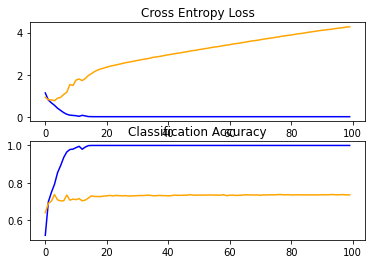

In [107]:
model_diag = model[1].fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
summarize_diagnostics(model_diag)


In [108]:
test_image = []
img = image.load_img('/content/drive/Shared drives/New Markets/Aman/Project Neo/temp_2.jpg',target_size=(56,56,3), grayscale=False)
img = image.img_to_array(img)
img = img/255
test_image.append(img)
test = np.array(test_image)



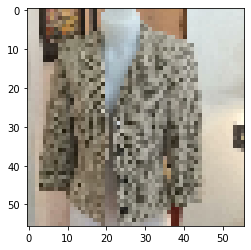

In [109]:
plt.imshow(img)

In [110]:
prediction = model[1].predict_classes(test)

In [111]:
prediction

array([0])

In [112]:
d

{'Dresses&Skirts': 0, 'Handbags': 1, 'Jackets&Blazers': 2, 'Shoes': 3}

## Checking Balance of dataset

In [58]:
 try:
      img_temp = image.load_img('/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e137b40b3e9171fb0ece02e.jpg', target_size=(56,56,3), grayscale=False)
except Exception as e:
      print(e)

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e137b40b3e9171fb0ece02e.jpg'


In [59]:
train.head()

,category,image_filename
0,0,5e17d1919d3b78474d296d12.jpg
1,0,5e102444138e1891a5c72ecb.jpg
2,0,5e0e754d9e1559244942bd6e.jpg
3,0,5e11196de974fbb7c1039027.jpg
4,0,5e195b3693b46a0f0f3f4354.jpg


In [63]:
train.drop(train[train['image_filename'] == '5e137b40b3e9171fb0ece02e.jpg'].index,axis = 0)


,category,image_filename
0,0,5e17d1919d3b78474d296d12.jpg
1,0,5e102444138e1891a5c72ecb.jpg
2,0,5e0e754d9e1559244942bd6e.jpg
3,0,5e11196de974fbb7c1039027.jpg
4,0,5e195b3693b46a0f0f3f4354.jpg
...,...,...
9995,3,5e1272e72cc51543596b6a61.jpg
9996,3,5e17dd7619c1572b80f1d8a8.jpg
9997,3,5e190bf821cd0a6ca2f3e09a.jpg
9998,3,5e1515fb318740ead388740a.jpg


In [66]:
import os
img_list = os.listdir("/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/")
len(img_list)

8643

In [67]:
train['flag'] = train['image_filename'].apply(lambda x: True if x in img_list else False)

In [71]:
train_cleaned = train[train['flag'] == True]
train_cleaned.head()

,category,image_filename,flag
0,0,5e17d1919d3b78474d296d12.jpg,True
1,0,5e102444138e1891a5c72ecb.jpg,True
2,0,5e0e754d9e1559244942bd6e.jpg,True
3,0,5e11196de974fbb7c1039027.jpg,True
4,0,5e195b3693b46a0f0f3f4354.jpg,True


In [72]:
train_cleaned.shape

(8634, 3)

In [76]:
train_cleaned['category'].value_counts()

0    2217
2    2179
3    2159
1    2079
Name: category, dtype: int64

In [78]:
len(train_image)

10000